In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('F:/A-Software Development Tools & Tutorials/Data Science Practice/Practical Example of Linear Regression/1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


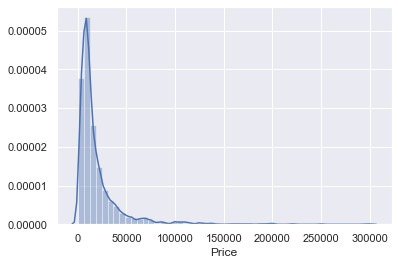

In [7]:
sns.distplot(data_no_mv['Price'])

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


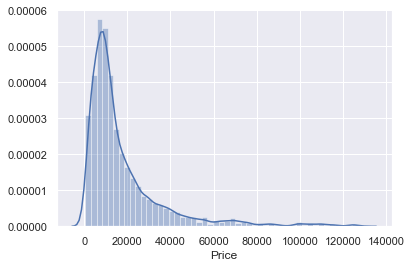

In [9]:
sns.distplot(data_1['Price'])

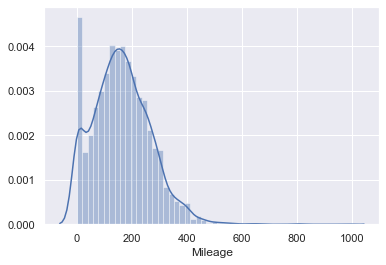

In [10]:
sns.distplot(data_no_mv['Mileage'])

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

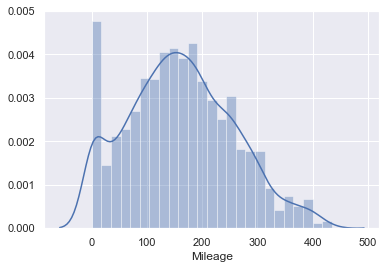

In [12]:
sns.distplot(data_2['Mileage'])

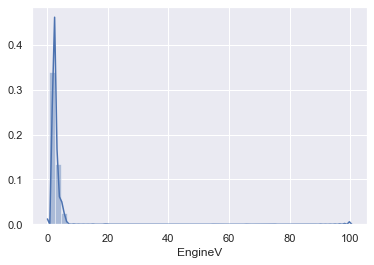

In [13]:
sns.distplot(data_no_mv['EngineV'])

In [14]:
data_3 = data_2[data_2['EngineV']<6.5]

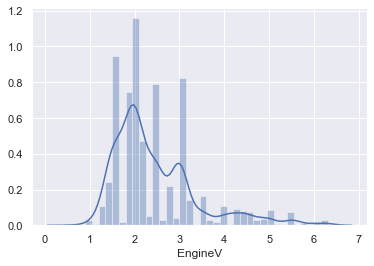

In [15]:
sns.distplot(data_3['EngineV'])

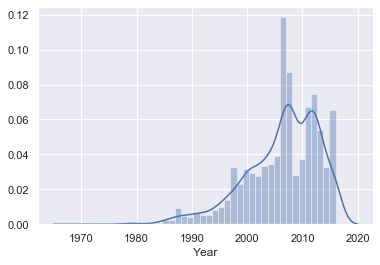

In [16]:
sns.distplot(data_no_mv['Year'])

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']<q]

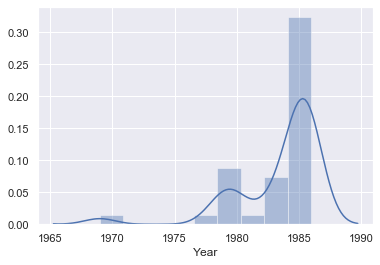

In [18]:
sns.distplot(data_4['Year'])

In [19]:
data_cleaned = data_4.reset_index(drop=True)

In [20]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,36,36.000000,36,36.000000,36.000000,36,36,36.000000
unique,7,NaN,6,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,12,NaN,23,NaN,NaN,18,36,NaN
mean,NaN,3635.923611,NaN,189.055556,2.000000,NaN,NaN,1983.472222
std,NaN,5649.252518,NaN,119.727057,0.523723,NaN,NaN,3.525305
min,NaN,600.000000,NaN,1.000000,1.100000,NaN,NaN,1969.000000
25%,NaN,1825.000000,NaN,107.500000,1.600000,NaN,NaN,1982.750000
50%,NaN,2250.000000,NaN,197.000000,2.000000,NaN,NaN,1985.000000
75%,NaN,3275.000000,NaN,283.250000,2.300000,NaN,NaN,1986.000000


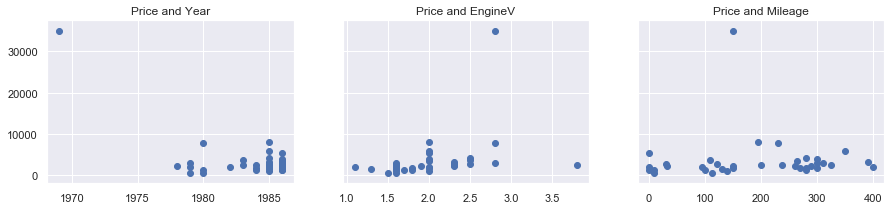

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

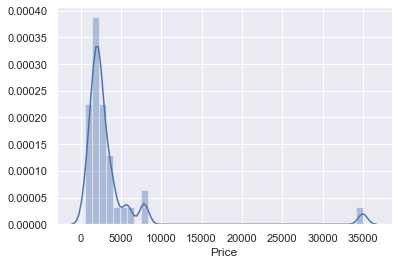

In [22]:
sns.distplot(data_cleaned['Price'])

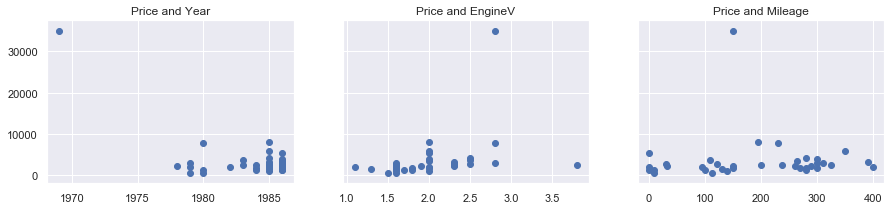

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [24]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Audi,600.00,sedan,112,1.6,Petrol,yes,1980,6.396930
1,Toyota,600.00,sedan,10,1.5,Petrol,yes,1979,6.396930
2,Audi,3500.00,sedan,265,2.0,Diesel,yes,1986,8.160518
3,Mercedes-Benz,2700.00,sedan,121,2.5,Diesel,yes,1986,7.901007
4,Mitsubishi,5500.00,crossover,1,2.0,Petrol,yes,1986,8.612503
5,Mercedes-Benz,34999.00,sedan,150,2.8,Petrol,yes,1969,10.463075
6,Mercedes-Benz,1850.00,sedan,281,2.0,Diesel,yes,1985,7.522941
7,Volkswagen,2500.00,sedan,324,1.6,Diesel,yes,1984,7.824046
8,Mercedes-Benz,2300.00,sedan,261,2.3,Gas,yes,1978,7.740664
9,Volkswagen,1550.00,hatch,130,1.3,Petrol,yes,1986,7.346010


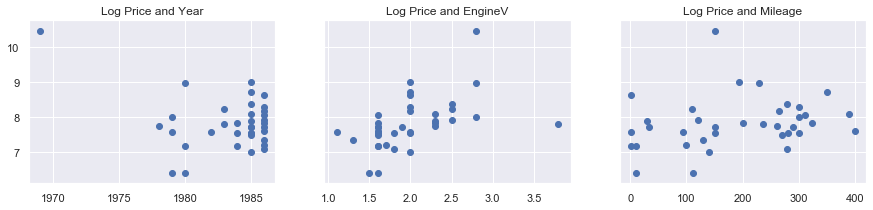

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [26]:
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [28]:
vif

,VIF,features
0,3.647258,Mileage
1,17.034136,Year
2,16.285012,EngineV


In [29]:
data_no_multicolinearity = data_cleaned.drop(['Year'],axis=1)

In [30]:
data_no_multicolinearity1 = data_no_multicolinearity.drop(['EngineV'],axis=1)

In [31]:
data_no_multicolinearity1

,Brand,Price,Body,Mileage,Engine Type,Registration,log_price
0,Audi,600.00,sedan,112,Petrol,yes,6.396930
1,Toyota,600.00,sedan,10,Petrol,yes,6.396930
2,Audi,3500.00,sedan,265,Diesel,yes,8.160518
3,Mercedes-Benz,2700.00,sedan,121,Diesel,yes,7.901007
4,Mitsubishi,5500.00,crossover,1,Petrol,yes,8.612503
5,Mercedes-Benz,34999.00,sedan,150,Petrol,yes,10.463075
6,Mercedes-Benz,1850.00,sedan,281,Diesel,yes,7.522941
7,Volkswagen,2500.00,sedan,324,Diesel,yes,7.824046
8,Mercedes-Benz,2300.00,sedan,261,Gas,yes,7.740664
9,Volkswagen,1550.00,hatch,130,Petrol,yes,7.346010


In [32]:
data_with_dummies = pd.get_dummies(data_no_multicolinearity1,drop_first=True)

In [33]:
data_with_dummies.head()

,Price,Mileage,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Petrol
0,600.0,112,6.396930,0,0,0,0,0,0,0,0,1,0,0,0,1
1,600.0,10,6.396930,0,0,0,0,1,0,0,0,1,0,0,0,1
2,3500.0,265,8.160518,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2700.0,121,7.901007,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5500.0,1,8.612503,0,0,1,0,0,0,0,0,0,0,0,0,1


In [34]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Petrol'], dtype=object)

In [35]:
cols = ['log_price','Price', 'Mileage',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Petrol']

In [36]:
data_prepossesed  = data_with_dummies[cols]
data_prepossesed.head()

,log_price,Price,Mileage,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Petrol
0,6.396930,600.0,112,0,0,0,0,0,0,0,0,1,0,0,0,1
1,6.396930,600.0,10,0,0,0,0,1,0,0,0,1,0,0,0,1
2,8.160518,3500.0,265,0,0,0,0,0,0,0,0,1,0,0,0,0
3,7.901007,2700.0,121,0,1,0,0,0,0,0,0,1,0,0,0,0
4,8.612503,5500.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


In [37]:
targets = data_prepossesed['log_price']
inputs = data_prepossesed.drop(['log_price'],axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
input_scaled = scaler.transform(inputs)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_scaled,targets,test_size =0.2,random_state=365)

In [41]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_hat = reg.predict(x_train)

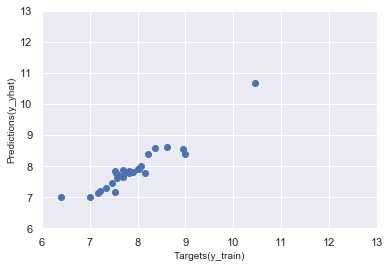

In [43]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)',size=10)
plt.ylabel('Predictions(y_yhat)',size=10)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

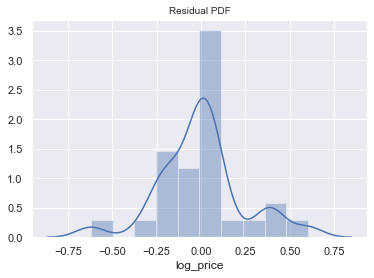

In [44]:
sns.distplot(y_train-y_hat)
plt.title('Residual PDF',size=10)

In [45]:
reg.score(x_train,y_train)

0.8955207064756395

In [46]:
reg.intercept_

7.865564509145703

In [47]:
reg.coef_

array([ 0.55007347,  0.09381615,  0.19846676,  0.10777865,  0.22942611,
        0.02091276,  0.0451251 ,  0.06026109, -0.05599935,  0.09567599,
       -0.09566168,  0.02524303, -0.12140319, -0.02194846, -0.17223887])

In [48]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['weights'] = reg.coef_
reg_summary

,Features,weights
0,Price,0.550073
1,Mileage,0.093816
2,Brand_BMW,0.198467
3,Brand_Mercedes-Benz,0.107779
4,Brand_Mitsubishi,0.229426
5,Brand_Renault,0.020913
6,Brand_Toyota,0.045125
7,Brand_Volkswagen,0.060261
8,Body_hatch,-0.055999
9,Body_other,0.095676


In [49]:
data_cleaned ['Brand'].unique()

array(['Audi', 'Toyota', 'Mercedes-Benz', 'Mitsubishi', 'Volkswagen',
       'BMW', 'Renault'], dtype=object)

In [50]:
y_hat_test = reg.predict(x_test)

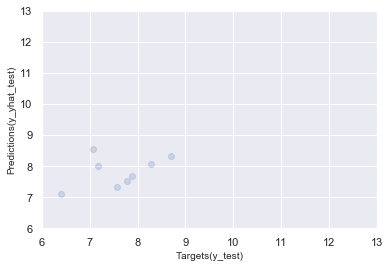

In [51]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets(y_test)',size=10)
plt.ylabel('Predictions(y_yhat_test)',size=10)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,3197.688122
1,1514.972891
2,1847.890523
3,1209.890413
4,5181.920976


In [53]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,3197.688122,NaN
1,1514.972891,600.0
2,1847.890523,NaN
3,1209.890413,NaN
4,5181.920976,NaN
5,4070.767145,NaN
6,2150.959729,NaN
7,2955.396387,NaN


In [54]:
y_test

32    8.281471
30    7.575585
21    7.783224
1     6.396930
17    7.073270
14    8.699515
25    7.882315
29    7.170120
Name: log_price, dtype: float64

In [55]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    8.281471
1    7.575585
2    7.783224
3    6.396930
4    7.073270
Name: log_price, dtype: float64

In [56]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,3197.688122,3950.0
1,1514.972891,1950.0
2,1847.890523,2400.0
3,1209.890413,600.0
4,5181.920976,1180.0
5,4070.767145,6000.0
6,2150.959729,2650.0
7,2955.396387,1300.0


In [57]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [58]:
df_pf['Differences%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [61]:
df_pf.describe()

,Predictions,Target,Residual,Differences%
count,8.00,8.00,8.00,8.00
mean,2766.19,2503.75,-262.44,85.43
std,1361.15,1751.73,1836.45,110.81
min,1209.89,600.00,-4001.92,18.83
25%,1764.66,1270.00,-871.27,21.49
50%,2553.18,2175.00,467.03,27.58
75%,3415.96,2975.00,602.16,108.07
max,5181.92,6000.00,1929.23,339.15


In [60]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f'% x)
df_pf.sort_values(by=['Differences%'])

,Predictions,Target,Residual,Differences%
6,2150.96,2650.00,499.04,18.83
0,3197.69,3950.00,752.31,19.05
1,1514.97,1950.00,435.03,22.31
2,1847.89,2400.00,552.11,23.00
5,4070.77,6000.00,1929.23,32.15
3,1209.89,600.00,-609.89,101.65
7,2955.40,1300.00,-1655.40,127.34
4,5181.92,1180.00,-4001.92,339.15


In [63]:
pd.options.display.max_rows = 999
df_pf.sort_values(by=['Differences%'])

,Predictions,Target,Residual,Differences%
6,2150.96,2650.00,499.04,18.83
0,3197.69,3950.00,752.31,19.05
1,1514.97,1950.00,435.03,22.31
2,1847.89,2400.00,552.11,23.00
5,4070.77,6000.00,1929.23,32.15
3,1209.89,600.00,-609.89,101.65
7,2955.40,1300.00,-1655.40,127.34
4,5181.92,1180.00,-4001.92,339.15
